<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4* Jonatan Rivera

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [1]:
#Import modules that will be used to make LDA topic model on Amazon Reviews
import numpy as np
import gensim
import os
import re
from ast import literal_eval

import gensim
import os
import re
from ast import literal_eval

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS 
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS 
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

import pandas as pd
import tqdm

In [2]:
#Begin by reading converting amazon data into pandas dataframe
import pandas as pd

#Start Here
df = pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv'

In [3]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batteries (36 Count),"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,Camcorder Batteries,Camera & Photo,Batteries,Househ...",Health & Beauty,"https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%2BkL._SL1500_.jpg,https://images-na.ss...","amazonbasics/hl002619,amazonbasicsaaaperformancealkalinebatteries36count/b00lh3dmuo,084171010644...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9P0O/,I order 3 of them and one of the item is bad quality. Is missing backup spring so I have to put ...,... 3 of them and one of the item is bad quality. Is missing backup spring so I have ...,Byger yang,"https://www.barcodable.com/upc/841710106442,https://www.amazon.com/AmazonBasics-Performance-Alka..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batteries (36 Count),"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,Camcorder Batteries,Camera & Photo,Batteries,Househ...",Health & Beauty,"https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%2BkL._SL1500_.jpg,https://images-na.ss...","amazonbasics/hl002619,amazonbasicsaaaperformancealkalinebatteries36count/b00lh3dmuo,084171010644...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9P0O/,Bulk is always the less expensive way to go for products like these,... always the less expensive way to go for products like,ByMG,"https://www.barcodable.com/upc/841710106442,https://www.amazon.com/AmazonBasics-Performance-Alka..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batteries (36 Count),"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,Camcorder Batteries,Camera & Photo,Batteries,Househ...",Health & Beauty,"https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%2BkL._SL1500_.jpg,https://images-na.ss...","amazonbasics/hl002619,amazonbasicsaaaperformancealkalinebatteries36count/b00lh3dmuo,084171010644...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9P0O/,Well they are not Duracell but for the price i am happy.,... are not Duracell but for the price i am happy.,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,https://www.amazon.com/AmazonBasics-Performance-Alka..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batteries (36 Count),"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,Camcorder Batteries,Camera & Photo,Batteries,Househ...",Health & Beauty,"https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%2BkL._SL1500_.jpg,https://images-na.ss...","amazonbasics/hl002619,amazonbasicsaaaperformancealkalinebatteries36count/b00lh3dmuo,084171010644...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9P0O/,Seem to work as well as name brand batteries at a much better price,... as well as name brand batteries at a much better,Bymark sexson,"https://www.barcodable.com/upc/841710106442,https://www.amazon.com/AmazonBasics-Performance-Alka..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batteries (36 Count),"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,Camcorder Batteries,Camera & Photo,Batteries,Househ...",Health & Beauty,"https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%2BkL._SL1500_.jpg,https://images-na.ss...","amazonbasics/hl002619,amazonbasicsaaaperformancealkalinebatteries36count/b00lh3dmuo,084171010644...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com

In [4]:
import spacy
#load nlp model in spacy
nlp = spacy.load("en_core_web_lg")

#create function to tokenized reviews
def tokenize(document):
    """tokenizes text and returns the lemmas, excludes puncttion, and stop words"""
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

In [5]:
#create tokens column, will be used to make keywords for the reviews test
df['tokens'] = df['reviews.text'].apply(tokenize)

In [6]:
df['tokens'][:10]

0                      [order, 3, item, bad, quality, miss, backup, spring, pc, aluminum, battery, work]
1                                                                  [bulk, expensive, way, product, like]
2                                                                               [Duracell, price, happy]
3                                                                    [work, brand, battery, well, price]
4                                                                    [battery, long, last, price, great]
5    [buy, lot, battery, Christmas, AmazonBasics, Cell, good, notice, difference, brand, battery, Ama...
6                                                        [have, problame, battery, order, past, pleased]
7                                                     [look, cheap, non, rechargeable, battery, perfect]
8                                     [hold, high, power, juice, like, energizer, duracell, half, price]
9                                       [AmazonBasics, 

In [7]:
# Make a list of custom stop words
stop_words = [
    'order',
    'buy',
    'good', 
    'bad',
    'battery'
    'well'
    'perfect'
    
]



In [8]:
stops = nlp.Defaults.stop_words.union(stop_words)

In [9]:
#create remove_stop words function
def remove_stops(_list_):
    
    keywords = []
    
    for keyword in _list_:
        
        phrase = []
        
        words = keyword.split()
        
        for word in words:
            if word in stops:
                pass
            else: 
                phrase.append(word)
            
        phrase = ' '.join(phrase)
        
        if len(phrase) > 0:
            keywords.append(phrase)
    
    return keywords

In [10]:
#create a clean keywords column based on the tokens created for the text reviews column from df
from tqdm import tqdm

tqdm.pandas()

df['clean_keywords'] = df['tokens'].progress_apply(remove_stops)

/home/johnrivera/.virtualenvs/DS-Unit-4-Sprint-1-NLP-P3T_G5kE/lib/python3.8/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|██████████| 28332/28332 [00:00<00:00, 127408.51it/s]


In [11]:
df['clean_keywords'][765]

['great',
 'battery',
 'work',
 'find',
 'work',
 'best',
 'computer',
 'accessory',
 'like',
 'keyboard',
 'mouse',
 'long',
 'thing',
 'like',
 'toy',
 'remote',
 'control',
 'car',
 'big',
 'drain',
 'short',
 'burst',
 'like',
 'electric',
 'toy',
 'car',
 'motor',
 'shorten',
 'life',
 'battery',
 'fast',
 'thing',
 'use',
 'small',
 'energy',
 'long',
 'period',
 'time',
 'lot',
 'brand',
 'battery',
 'high',
 'drain',
 'electronic',
 'lot',
 'long',
 'use',
 'Amazon',
 'battery',
 'low',
 'draw',
 'electronic',
 'money',
 'worth',
 'find',
 'keyboard',
 'mouse',
 'laser',
 'pointer',
 'small',
 'led',
 'flashlight',
 'small',
 'noise',
 'toy',
 'play',
 'music',
 'electronic',
 'beeps)not',
 'electric',
 'motor',
 'toy',
 'car',
 'pencil',
 'sharpener',
 'etc',
 'value',
 'depend',
 'use',
 'power']

In [12]:
import gensim
from gensim import corpora
from gensim.models.ldamulticore import LdaMulticore

In [13]:
# Dict representation of all our keyword
# This also represents the fit step
id2word = corpora.Dictionary(df['clean_keywords'])

In [14]:
#look at the tokenid for power
id2word.token2id['power']

48

In [15]:
#number of keys
len(id2word.keys())

9670

In [16]:
#fiiltering step
id2word.filter_extremes(no_below=15, no_above=0.85)

In [17]:
len(id2word.keys())

1575

In [18]:
#This represents our transform statement
corpus = [id2word.doc2bow(text) for text in df['clean_keywords']]

In [19]:
corpus[812]

[(2, 3),
 (18, 1),
 (33, 1),
 (45, 1),
 (80, 1),
 (142, 1),
 (194, 2),
 (251, 1),
 (332, 1),
 (334, 1),
 (350, 1),
 (428, 1),
 (647, 1),
 (698, 1)]

In [20]:
#convert id back to word
id2word[44]

'power'

In [21]:
#create lda model
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   num_topics=5,
                   passes=50, 
                   workers=4
                  )

In [25]:
#print topics of lda model and there associated words
lda.print_topics()

[(0,
  '0.072*"tablet" + 0.034*"great" + 0.029*"app" + 0.024*"Amazon" + 0.024*"price" + 0.017*"use" + 0.013*"work" + 0.013*"need" + 0.011*"game" + 0.010*"movie"'),
 (1,
  '0.123*"battery" + 0.060*"great" + 0.051*"price" + 0.041*"work" + 0.034*"long" + 0.027*"brand" + 0.015*"product" + 0.014*"Amazon" + 0.013*"value" + 0.012*"quality"'),
 (2,
  '0.041*"easy" + 0.037*"read" + 0.037*"Kindle" + 0.030*"love" + 0.028*"kindle" + 0.028*"use" + 0.027*"book" + 0.025*"screen" + 0.023*"great" + 0.022*"size"'),
 (3,
  '0.023*"charge" + 0.017*"device" + 0.015*"like" + 0.014*"work" + 0.013*"Amazon" + 0.012*"time" + 0.012*"day" + 0.011*"problem" + 0.011*"find" + 0.010*"come"'),
 (4,
  '0.080*"love" + 0.047*"tablet" + 0.045*"kid" + 0.036*"old" + 0.035*"year" + 0.032*"great" + 0.028*"use" + 0.022*"easy" + 0.022*"game" + 0.020*"gift"')]

In [80]:
#apply regular expression to see most important words associated with each topic in a more readble way

words = [re.findall(r'"[^"]*"', t[1]) for t in lda.print_topics(20)]
words

/home/johnrivera/.virtualenvs/DS-Unit-4-Sprint-1-NLP-P3T_G5kE/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['"tablet"',
  '"great"',
  '"app"',
  '"Amazon"',
  '"price"',
  '"use"',
  '"work"',
  '"need"',
  '"game"',
  '"movie"'],
 ['"battery"',
  '"great"',
  '"price"',
  '"work"',
  '"long"',
  '"brand"',
  '"product"',
  '"Amazon"',
  '"value"',
  '"quality"'],
 ['"easy"',
  '"read"',
  '"Kindle"',
  '"love"',
  '"kindle"',
  '"use"',
  '"book"',
  '"screen"',
  '"great"',
  '"size"'],
 ['"charge"',
  '"device"',
  '"like"',
  '"work"',
  '"Amazon"',
  '"time"',
  '"day"',
  '"problem"',
  '"find"',
  '"come"'],
 ['"love"',
  '"tablet"',
  '"kid"',
  '"old"',
  '"year"',
  '"great"',
  '"use"',
  '"easy"',
  '"game"',
  '"gift"']]

In [81]:
#convert topic labels from a list format to string format, pass string into topic labels
topic_labels= [', '.join(t[0:5]) for t in words]
topic_labels

/home/johnrivera/.virtualenvs/DS-Unit-4-Sprint-1-NLP-P3T_G5kE/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['"tablet", "great", "app", "Amazon", "price"',
 '"battery", "great", "price", "work", "long"',
 '"easy", "read", "Kindle", "love", "kindle"',
 '"charge", "device", "like", "work", "Amazon"',
 '"love", "tablet", "kid", "old", "year"']

In [41]:
#print topic labels in nice format
for id, t in enumerate(topic_labels): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
"tablet", "great", "app", "Amazon", "price"

------ Topic 1 ------
"battery", "great", "price", "work", "long"

------ Topic 2 ------
"easy", "read", "Kindle", "love", "kindle"

------ Topic 3 ------
"charge", "device", "like", "work", "Amazon"

------ Topic 4 ------
"love", "tablet", "kid", "old", "year"



/home/johnrivera/.virtualenvs/DS-Unit-4-Sprint-1-NLP-P3T_G5kE/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
#analyze lda model, with visualizations
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

/home/johnrivera/.virtualenvs/DS-Unit-4-Sprint-1-NLP-P3T_G5kE/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
pyLDAvis.gensim.prepare(lda, corpus, id2word)

/home/johnrivera/.virtualenvs/DS-Unit-4-Sprint-1-NLP-P3T_G5kE/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.214112  0.137259       1        1  27.020005
4     -0.226575 -0.104582       2        1  20.638088
0     -0.004820  0.095212       3        1  19.699247
2     -0.155073  0.093403       4        1  16.669726
3      0.172356 -0.221292       5        1  15.972934, topic_info=          Term         Freq        Total Category  logprob  loglift
2      battery  9331.000000  9331.000000  Default  30.0000  30.0000
71        love  6042.000000  6042.000000  Default  29.0000  29.0000
1293    tablet  7400.000000  7400.000000  Default  28.0000  28.0000
151        kid  2791.000000  2791.000000  Default  27.0000  27.0000
15       price  5345.000000  5345.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
241       case   306.993926   863.011007   Topic5  -4.9873   0.8007
30    purchase   396.253731  2564.133108   Topic5  -4.7321  -0.0330
195        new   289.590986  1058.158808   Topic5  -5.0456   0.5385
173          2   264.878250   966.843456   Topic5  -5.1348   0.5395
75        want   267.073076  1283.168349   Topic5  -5.1266   0.2647

[339 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
1401      3  0.909372      $
1401      4  0.022734      $
1401      5  0.068203      $
173       1  0.147904      2
173       2  0.570930      2
...     ...       ...    ...
83        1  0.060886   year
83        2  0.916850   year
83        5  0.022221   year
695       2  0.997966  young
835       2  0.998351     yr

[509 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 1, 3, 4])

In [44]:
distro = [lda[doc] for doc in corpus]

/home/johnrivera/.virtualenvs/DS-Unit-4-Sprint-1-NLP-P3T_G5kE/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
distro[0]

/home/johnrivera/.virtualenvs/DS-Unit-4-Sprint-1-NLP-P3T_G5kE/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 0.02242211),
 (1, 0.56459117),
 (2, 0.022470677),
 (3, 0.36790973),
 (4, 0.022606287)]

In [48]:
def update(doc):
    d_dist = {k:0 for k in range(0,5)}
    for t in doc:
        d_dist[t[0]] = t[1]
    return d_dist

new_distro = [update(doc) for doc in distro] 

/home/johnrivera/.virtualenvs/DS-Unit-4-Sprint-1-NLP-P3T_G5kE/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
topics = pd.DataFrame.from_records(new_distro)
topics.columns = topic_labels


/home/johnrivera/.virtualenvs/DS-Unit-4-Sprint-1-NLP-P3T_G5kE/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
topics.head()

/home/johnrivera/.virtualenvs/DS-Unit-4-Sprint-1-NLP-P3T_G5kE/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,"""tablet"", ""great"", ""app"", ""Amazon"", ""price""","""battery"", ""great"", ""price"", ""work"", ""long""","""easy"", ""read"", ""Kindle"", ""love"", ""kindle""","""charge"", ""device"", ""like"", ""work"", ""Amazon""","""love"", ""tablet"", ""kid"", ""old"", ""year"""
0,0.022422,0.564591,0.022471,0.367910,0.022606
1,0.033801,0.864559,0.033851,0.034145,0.033644
2,0.050379,0.797104,0.051148,0.050563,0.050805
3,0.040219,0.839646,0.040030,0.040098,0.040008
4,0.040295,0.839420,0.040131,0.040004,0.040151


In [51]:
df['primary_topic'] = topics.idxmax(axis=1)


/home/johnrivera/.virtualenvs/DS-Unit-4-Sprint-1-NLP-P3T_G5kE/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
df.head()


/home/johnrivera/.virtualenvs/DS-Unit-4-Sprint-1-NLP-P3T_G5kE/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,tokens,clean_keywords,primary_topic
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batteries (36 Count),"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,Camcorder Batteries,Camera & Photo,Batteries,Househ...",Health & Beauty,"https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%2BkL._SL1500_.jpg,https://images-na.ss...","amazonbasics/hl002619,amazonbasicsaaaperformancealkalinebatteries36count/b00lh3dmuo,084171010644...",...,NaN,3,https://www.amazon.com/product-reviews/B00QWO9P0O/,I order 3 of them and one of the item is bad quality. Is missing backup spring so I have to put ...,... 3 of them and one of the item is bad quality. Is missing backup spring so I have ...,Byger yang,"https://www.barcodable.com/upc/841710106442,https://www.amazon.com/AmazonBasics-Performance-Alka...","[order, 3, item, bad, quality, miss, backup, spring, pc, aluminum, battery, work]","[3, item, quality, miss, backup, spring, pc, aluminum, battery, work]","""battery"", ""great"", ""price"", ""work"", ""long"""
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batteries (36 Count),"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,Camcorder Batteries,Camera & Photo,Batteries,Househ...",Health & Beauty,"https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%2BkL._SL1500_.jpg,https://images-na.ss...","amazonbasics/hl002619,amazonbasicsaaaperformancealkalinebatteries36count/b00lh3dmuo,084171010644...",...,NaN,4,https://www.amazon.com/product-reviews/B00QWO9P0O/,Bulk is always the less expensive way to go for products like these,... always the less expensive way to go for products like,ByMG,"https://www.barcodable.com/upc/841710106442,https://www.amazon.com/AmazonBasics-Performance-Alka...","[bulk, expensive, way, product, like]","[bulk, expensive, way, product, like]","""battery"", ""great"", ""price"", ""work"", ""long"""
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batteries (36 Count),"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,Camcorder Batteries,Camera & Photo,Batteries,Househ...",Health & Beauty,"https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%2BkL._SL1500_.jpg,https://images-na.ss...","amazonbasics/hl002619,amazonbasicsaaaperformancealkalinebatteries36count/b00lh3dmuo,084171010644...",...,NaN,5,https://www.amazon.com/product-reviews/B00QWO9P0O/,Well they are not Duracell but for the price i am happy.,... are not Duracell but for the price i am happy.,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,https://www.amazon.com/AmazonBasics-Performance-Alka...","[Duracell, price, happy]","[Duracell, price, happy]","""battery"", ""great"", ""price"", ""work"", ""long"""
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batteries (36 Count),"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,Camcorder Batteries,Camera & Photo,Batteries,Househ...",Health & Beauty,"https://images-na.ssl-images-amazon.com/images/I/81qmNyJo%2BkL._SL1500_.jpg,https://images-na.ss...","amazonbasics/hl002619,amazonbasicsaaaperformancealkalinebatteries36count/b00lh3dmuo,084171010644...",...,NaN,5,https://www.amazon.com/product-reviews/B00QWO9P0O/,Seem to work as well as name brand batteries at a much better price,... as well as name brand batteries at a much better,Bymark sexson,"https://www.barcodable.com/upc/841710106442,https://www.amazon.com/AmazonBasics-Performance-Alka...","[work, brand, battery, well, price]","[work, brand, battery, price]","""battery"", ""great"", ""price"", ""work"", ""long"""
4,AVpg

In [56]:
df['primary_topic'].value_counts()


/home/johnrivera/.virtualenvs/DS-Unit-4-Sprint-1-NLP-P3T_G5kE/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


"battery", "great", "price", "work", "long"     11285
"love", "tablet", "kid", "old", "year"           6229
"tablet", "great", "app", "Amazon", "price"      4588
"easy", "read", "Kindle", "love", "kindle"       3877
"charge", "device", "like", "work", "Amazon"     2353
Name: primary_topic, dtype: int64

In [62]:
agg = pd.pivot_table(df, values=['reviews.text'], 
                     index=['primary_topic'], 
                     columns=['reviews.rating'], aggfunc='count')
agg

/home/johnrivera/.virtualenvs/DS-Unit-4-Sprint-1-NLP-P3T_G5kE/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


reviews.text                  \
reviews.rating                                          1    2    3     4   
primary_topic                                                               
"battery", "great", "price", "work", "long"           616  350  483  1398   
"charge", "device", "like", "work", "Amazon"          239  126  159   584   
"easy", "read", "Kindle", "love", "kindle"             21   33   84   810   
"love", "tablet", "kid", "old", "year"                 28   26  142  1367   
"tablet", "great", "app", "Amazon", "price"            61   81  338  1489   

                                                    
reviews.rating                                   5  
primary_topic                                       
"battery", "great", "price", "work", "long"   8438  
"charge", "device", "like", "work", "Amazon"  1245  
"easy", "read", "Kindle", "love", "kindle"    2929  
"love", "tablet", "kid", "old", "year"        4666  
"tablet", "great", "app", "Amazon", "price"   2619

In [63]:
agg = agg.reset_index()
agg

/home/johnrivera/.virtualenvs/DS-Unit-4-Sprint-1-NLP-P3T_G5kE/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


primary_topic reviews.text  \
reviews.rating                                                          1   
0                "battery", "great", "price", "work", "long"          616   
1               "charge", "device", "like", "work", "Amazon"          239   
2                 "easy", "read", "Kindle", "love", "kindle"           21   
3                     "love", "tablet", "kid", "old", "year"           28   
4                "tablet", "great", "app", "Amazon", "price"           61   

                                      
reviews.rating    2    3     4     5  
0               350  483  1398  8438  
1               126  159   584  1245  
2                33   84   810  2929  
3                26  142  1367  4666  
4                81  338  1489  2619

In [64]:
agg.columns = ['primary_topic', '1','2','3','4','5']
agg.head()

/home/johnrivera/.virtualenvs/DS-Unit-4-Sprint-1-NLP-P3T_G5kE/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,primary_topic,1,2,3,4,5
0,"""battery"", ""great"", ""price"", ""work"", ""long""",616,350,483,1398,8438
1,"""charge"", ""device"", ""like"", ""work"", ""Amazon""",239,126,159,584,1245
2,"""easy"", ""read"", ""Kindle"", ""love"", ""kindle""",21,33,84,810,2929
3,"""love"", ""tablet"", ""kid"", ""old"", ""year""",28,26,142,1367,4666
4,"""tablet"", ""great"", ""app"", ""Amazon"", ""price""",61,81,338,1489,2619


/home/johnrivera/.virtualenvs/DS-Unit-4-Sprint-1-NLP-P3T_G5kE/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


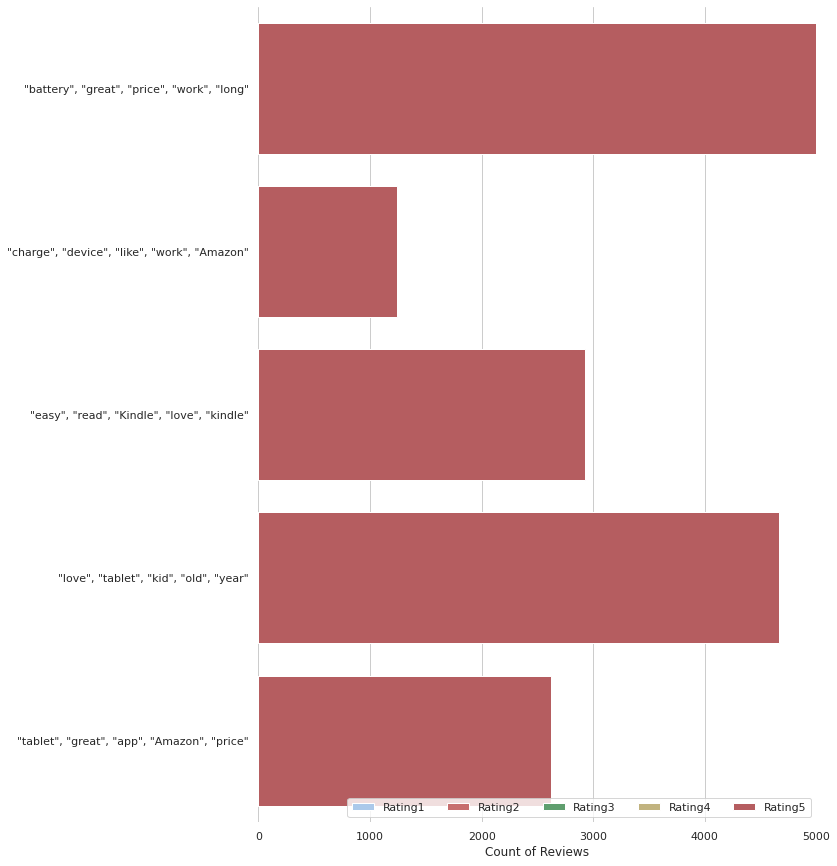

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 15))

sns.set_color_codes('pastel')
sns.barplot(x='1', y='primary_topic', data=agg, label="Rating1", color="b")

sns.set_color_codes('muted')
sns.barplot(x='2', y='primary_topic', data=agg, label="Rating2", color="r")

sns.set_color_codes('deep')
sns.barplot(x='3', y='primary_topic', data=agg, label="Rating3", color="g")


sns.barplot(x='4', y='primary_topic', data=agg, label="Rating4", color="y")

sns.barplot(x='5', y='primary_topic', data=agg, label="Rating5", color="r")

ax.legend(ncol=5, loc="lower right", frameon=True)
ax.set(xlim=(0,5000), ylabel="", xlabel="Count of Reviews")
sns.despine(left=True, bottom=True)

## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling